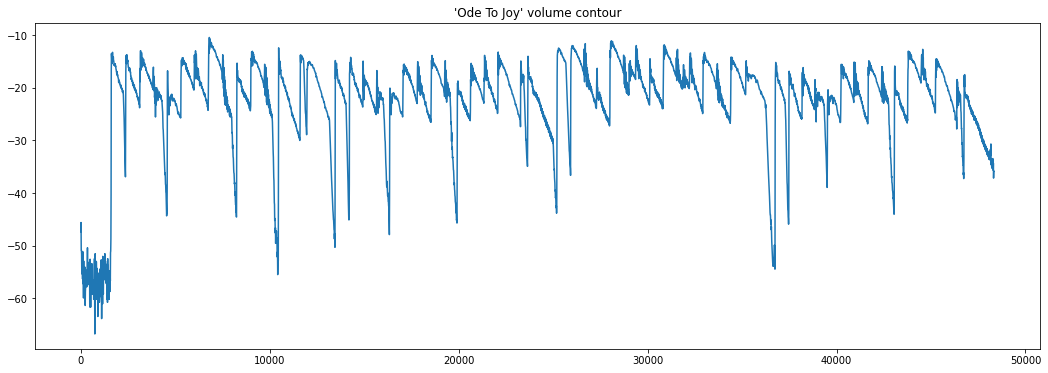

In [49]:
from pydub import AudioSegment
song = AudioSegment.from_file("/Users/linyaya/Desktop/ode1.m4a")
# Size of segments to break song into for volume calculations
SEGMENT_MS = 10
# dBFS is decibels relative to the maximum possible loudness
volume = [segment.dBFS for segment in song[::SEGMENT_MS]]

import matplotlib.pyplot as plt
import numpy as np


# Minimum volume necessary to be considered a note
VOLUME_THRESHOLD = -35
# The increase from one sample to the next required 
# to be considered a note
EDGE_THRESHOLD = 5
predicted_starts = []
for i in range(1, len(volume)):
    if (
        volume[i] > VOLUME_THRESHOLD and 
        volume[i] - volume[i - 1] > EDGE_THRESHOLD
    ):
        ms = i * SEGMENT_MS
        predicted_starts.append(ms)

        
plt.rcParams['figure.figsize'] = (18, 6) 
# for s in predicted_starts:
#     plt.axvline(x=s, color='r', linewidth=0.5, linestyle="-")
    
x_axis = np.arange(len(volume)) * (SEGMENT_MS)
plt.plot(x_axis, volume)
plt.title("'Ode To Joy' volume contour")
plt.show()
    

In [16]:
import array
import numpy as np
import scipy
from pydub.utils import get_array_type
from scipy.fft import fft
import sys
#sys.path.append("/usr/local/lib/python3.7/site-packages")
sys.path.append("/usr/local/lib/python3.8/site-packages")
import essentia
# import essentia.standard as es
from essentia.standard import *
from pydub import AudioSegment

from pylab import plot, show, figure, imshow

def detect_onsets(file_name):
    # Loading audio file
    audio = MonoLoader(filename=file_name)()
    # Computing onset detection functions.
    od1 = OnsetDetection(method='hfc')

    w = Windowing(type = 'hann')
    fft = FFT() # this gives us a complex FFT
    c2p = CartesianToPolar() # and this turns it into a pair (magnitude, phase)
    pool = essentia.Pool()

    for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512):
        mag, phase, = c2p(fft(w(frame)))
        pool.add('features.hfc', od1(mag, phase))

    # compute the actual onsets locations
    onsets = Onsets()

    onsets_hfc = onsets(essentia.array([ pool['features.hfc'] ]), [ 1 ])
    print("number of onsets:", len(onsets_hfc))
    if len(onsets_hfc) > 0:
        print("first onsets: ", onsets_hfc[0])
    else:
        print("no onset")

    return audio, onsets_hfc


number of onsets: 67
first onsets:  0.023219954


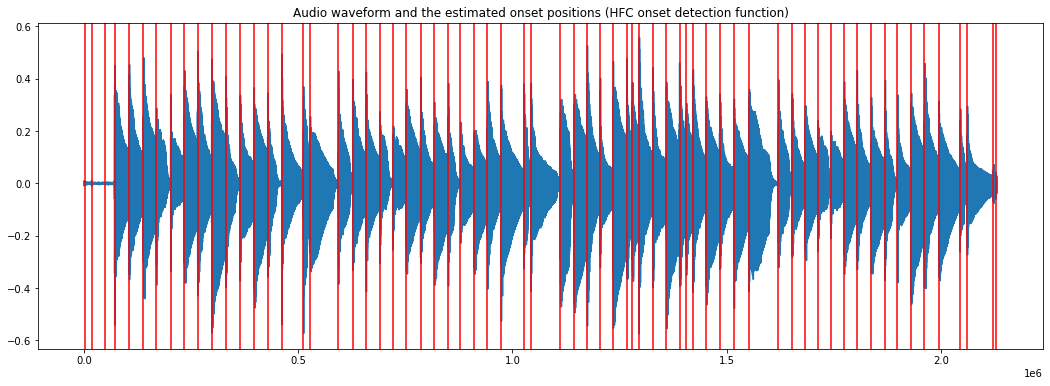

In [17]:
file_name = "/Users/linyaya/Desktop/ode1.m4a"
audio, onsets_hfc = detect_onsets(file_name)
plt.rcParams['figure.figsize'] = (18, 6) # set plot sizes to something larger than default
plot(audio)
for onset in onsets_hfc:
    plt.axvline(x=onset*44100, color='red')
plt.title("Audio waveform and the estimated onset positions (HFC onset detection function)")
plt.show()

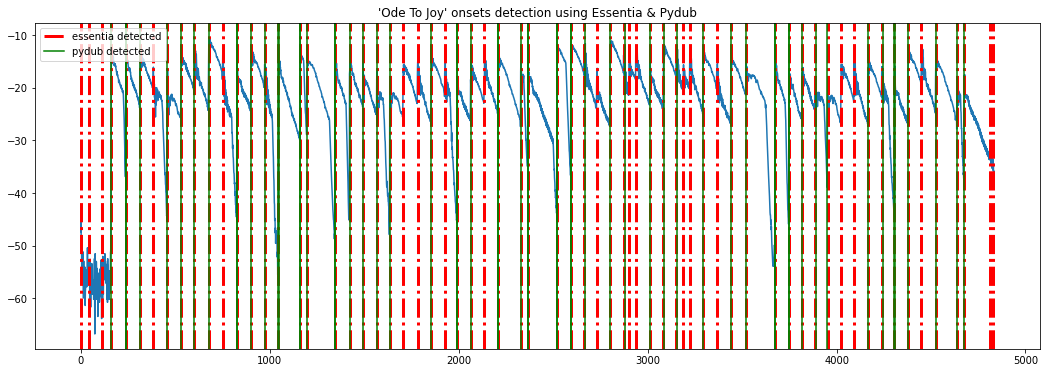

In [50]:
    volume2 = [segment.dBFS for segment in song[::10]]
    
    plt.rcParams['figure.figsize'] = (18, 6) # set plot sizes to something larger than default
    x_axis = np.arange(len(volume2))
    plt.plot(x_axis, volume2)
    for s in onsets_hfc:
        l1 = plt.axvline(x=s*100, color='r', linewidth=3, linestyle="dashdot", label="essentia detected")
        
    for s in predicted_starts:
        l2 = plt.axvline(x=s/10, color='g', linewidth=1.5, linestyle="solid", label="pydub detected")
 
    plt.legend(handles=[l1, l2],loc='upper left')
    plt.title("'Ode To Joy' onsets detection using Essentia & Pydub")
    plt.show()
    
#     '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

In [63]:
print(onsets_hfc * 1000)

[2.3219954e+01 4.0634921e+02 1.1261677e+03 1.6137869e+03 2.3800454e+03
 3.1346938e+03 3.8312927e+03 4.5743311e+03 5.2941499e+03 6.0139683e+03
 6.7570068e+03 7.5116553e+03 8.2546943e+03 8.9977324e+03 9.7291611e+03
 1.0460590e+04 1.1609978e+04 1.1969887e+04 1.3467574e+04 1.4222223e+04
 1.4942040e+04 1.5650249e+04 1.6346848e+04 1.7043447e+04 1.7821316e+04
 1.8541135e+04 1.9260951e+04 1.9922723e+04 2.0630930e+04 2.1350748e+04
 2.2082176e+04 2.3278004e+04 2.3661135e+04 2.5205262e+04 2.5925080e+04
 2.6644898e+04 2.7306668e+04 2.8003266e+04 2.8723084e+04 2.9024943e+04
 2.9373244e+04 3.0116281e+04 3.0824490e+04 3.1521088e+04 3.1869389e+04
 3.2217686e+04 3.2937504e+04 3.3657324e+04 3.4400363e+04 3.5201449e+04
 3.6757188e+04 3.7477004e+04 3.8173605e+04 3.8846984e+04 3.9520363e+04
 4.0228574e+04 4.0925172e+04 4.1679816e+04 4.2399637e+04 4.3061406e+04
 4.3769613e+04 4.4489434e+04 4.5244082e+04 4.6370250e+04 4.6753379e+04
 4.8111746e+04 4.8274285e+04]


In [60]:
onsets_hfc = [1.61378682e+00,
 2.38004541e+00 ,3.13469386e+00 3.83129263e+00 4.57433128e+00
 5.29414988e+00 6.01396847e+00 6.75700665e+00 7.51165533e+00
 8.25469398e+00 8.99773216e+00 9.72916126e+00 1.04605894e+01
 1.16099777e+01 1.19698868e+01 1.34675741e+01 1.42222223e+01
 1.49420404e+01 1.56502495e+01 1.63468475e+01 1.70434475e+01
 1.78213158e+01 1.85411339e+01 1.92609520e+01 1.99227219e+01
 2.06309299e+01 2.13507481e+01 2.20821762e+01 2.32780037e+01
 2.36611347e+01 2.52052612e+01 2.59250793e+01 2.66448975e+01
 2.73066673e+01 2.80032654e+01 2.87230835e+01 2.90249424e+01
 2.93732433e+01 3.01162815e+01 3.08244896e+01 3.15210876e+01
 3.18693886e+01 3.22176857e+01 3.29375038e+01 3.36573257e+01
 3.44003639e+01 3.52014503e+01 3.67571869e+01 3.74770050e+01
 3.81736069e+01 3.88469849e+01 3.95203629e+01 4.02285728e+01
 4.09251709e+01 4.16798172e+01 4.23996353e+01 4.30614052e+01
 4.37696152e+01 4.44894333e+01 4.52440834e+01 4.63702507e+01
 4.67533798e+01]
print(len(onsets_hfc))

SyntaxError: invalid syntax (<ipython-input-60-5bdec315dc27>, line 2)

Duration of the audio sample [sec]:
48.34


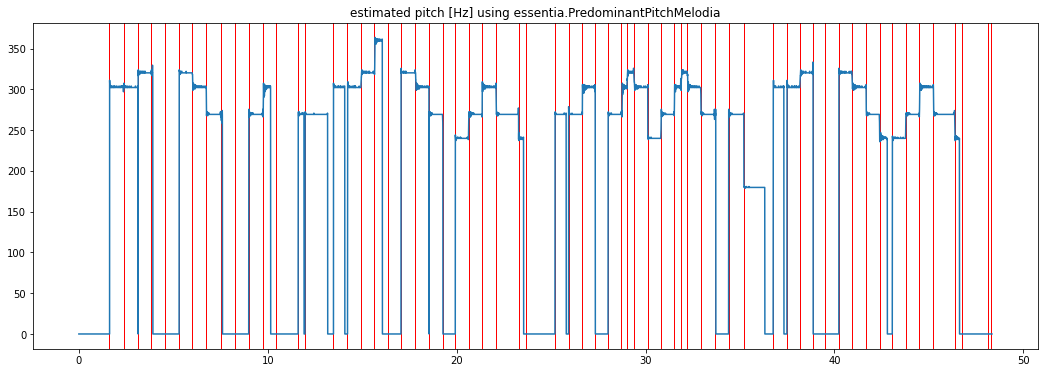

In [64]:
import numpy
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6) 
# Load audio file; it is recommended to apply equal-loudness filter for PredominantPitchMelodia
loader = EqloudLoader(filename=file_name, sampleRate=48000)
audio = loader()
print("Duration of the audio sample [sec]:")
print(len(audio)/48000.0)

# Extract the pitch curve
# PitchMelodia takes the entire audio signal as input (no frame-wise processing is required)

pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=128)
pitch_values, pitch_confidence = pitch_extractor(audio)

# Pitch is estimated on frames. Compute frame time positions
pitch_times = numpy.linspace(0.0,len(audio)/48000.0,len(pitch_values) )

# Plot the estimated pitch contour and confidence over time
# f, axarr = plt.subplots(2, sharex=True)
for s in onsets_hfc[3:]:
    l1 = plt.axvline(x=s, color='r', linewidth=1, linestyle="-", label="essentia detected")
plt.plot(pitch_times, pitch_values)
plt.title('estimated pitch [Hz] using essentia.PredominantPitchMelodia')
# axarr[1].plot(pitch_times, pitch_confidence)
# axarr[1].set_title('pitch confidence')
plt.show()